<a href="https://colab.research.google.com/github/sehab1611251/NLP-Project/blob/main/NLP_Project_(TREC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Data Processing.

In [ ]:
# Download the set of stop words the first time
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') #needed for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Get the list of stop words in English
stop_words = set(stopwords.words('english'))

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Load the dataset
data = pd.read_csv('/content/email_origin.csv', skiprows=1, names=['label', 'text'])

In [ ]:
data

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...
...,...,...
53663,1,versuchen sie unser produkt und sie werden fuh...
53664,1,while we may have high expectations of our ass...
53665,0,for those who are interested i just cook a lit...
53666,0,hello as i wrote i call sqlfetch channel t stu...


In [ ]:
print(data.columns)

Index(['label', 'text'], dtype='object')


In [ ]:
# Convert the labels to integer format
data['label'] = data['label'].astype(int)

In [ ]:
# Separate labels and text data
labels = data['label']
text_data = data['text']

In [ ]:
print(text_data)

0        do you feel the pressure to perform and not ri...
1        hi i've just updated from the gulus and i chec...
2        mega authenticv i a g r a discount pricec i a ...
3        hey billy it was really fun going out the othe...
4        system of the home it will have the capabiliti...
                               ...                        
53663    versuchen sie unser produkt und sie werden fuh...
53664    while we may have high expectations of our ass...
53665    for those who are interested i just cook a lit...
53666    hello as i wrote i call sqlfetch channel t stu...
53667    well are implicated when does not the stage wh...
Name: text, Length: 53668, dtype: object


In [ ]:
#Lowercase all text data
text_data = [text.lower() for text in text_data]

In [ ]:
#Find the number of unique words
#Remove stop words and perform lemmatization
text_data = [' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words) for text in text_data]
# Combine all the text data
all_text = ' '.join(text_data)
# Tokenize the text data
all_words = all_text.split(' ')
# Get the number of unique words
num_unique_words = len(set(all_words))
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 211186


In [ ]:
from collections import Counter
import numpy as np

# Count the frequency of each word
word_counts = Counter(all_words)
# Sort the words by frequency (from high to low)
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# Calculate the cumulative sum of word frequencies
cumulative_word_counts = np.cumsum([count for word, count in sorted_word_counts])
# Calculate the total number of word occurrences
total_word_count = cumulative_word_counts[-1]

# Find the smallest number of most frequent words that make up at least 95% of the total word occurrences
num_words_95_percent = next(i for i, cumulative_count in enumerate(cumulative_word_counts) if cumulative_count >= total_word_count * 0.95)

print(f"Number of words for 95% coverage: {num_words_95_percent}")


Number of words for 95% coverage: 23555


In [ ]:
#Tokenize the text data
tokenizer = Tokenizer(num_words=num_words_95_percent)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [ ]:
# Get the vocabulary size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1  # Consider padding index (0)

In [ ]:
vocab_size

209664

In [ ]:
#Find maximum length of a sequence
# Calculate the length of each sequence
sequence_lengths = [len(sequence) for sequence in sequences]
# Find the maximum length
max_len = max(sequence_lengths)
print(f"Maximum length: {max_len}") # Adjustable hyperparameter

Maximum length: 94773


In [ ]:
# Find the length that covers 95% of the sequences
max_len_95_percent = int(np.percentile(sequence_lengths, 95))
print(f"Length for 95% coverage: {max_len_95_percent}")

Length for 95% coverage: 532


In [ ]:
#Pad sequences with zeros to ensure a fixed length (e.g., max_len)
padded_sequences = pad_sequences(sequences, maxlen=max_len_95_percent, padding='post')

In [ ]:
len(padded_sequences[0])

532

In [ ]:
# Split the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)  # Split into temp and test sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # Split temp set into training and validation sets

In [ ]:
# This section returns the processed data ready for model building
processed_data = (X_train, X_val, X_test, y_train, y_val, y_test, vocab_size)

In [ ]:
processed_data

(array([[ 5064,   680,    15, ...,     0,     0,     0],
        [  170,   561,    10, ...,     0,     0,     0],
        [  363,  1951,   314, ...,     0,     0,     0],
        ...,
        [  557,  3355, 14830, ...,     0,     0,     0],
        [    2,    93,   278, ...,     0,     0,     0],
        [  228,  1342,    36, ...,     0,     0,     0]], dtype=int32),
 array([[ 202,  443,  213, ...,    0,    0,    0],
        [1182,  485, 5641, ...,    0,    0,    0],
        [ 925,   31,  239, ...,    0,    0,    0],
        ...,
        [5716,  486,    5, ...,    0,    0,    0],
        [ 274,   44,  210, ...,    0,    0,    0],
        [ 606, 1935, 6144, ...,    0,    0,    0]], dtype=int32),
 array([[ 587,  302,  725, ...,    0,    0,    0],
        [ 781, 1358, 1217, ...,    0,    0,    0],
        [1267,  274,    3, ...,    0,    0,    0],
        ...,
        [ 461,  669, 1105, ...,    0,    0,    0],
        [ 345,  320,    1, ...,    0,    0,    0],
        [ 872,    1,    1, .

# Model Building.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Get the processed data from Data Processing Step
X_train, X_val, X_test, y_train, y_val, y_test, vocab_size = processed_data

In [ ]:
# Define the model
embed_dim = 64  # Embedding dimension
rnn_units = 128 # Number of units in LSTM layers
batch_size = 32  # Batch size for training
learning_rate = 0.0001  # Learning rate
dropout_rate = 0.5  # Dropout rate
l2_reg = 0.01  # L2 regularization rate

In [ ]:
inputs = Input(shape=(max_len_95_percent,), dtype=tf.int32)

In [ ]:
# Embedding layer to convert word indices to vectors
embeddings = Embedding(vocab_size, embed_dim)(inputs)

In [ ]:
# Bi-directional LSTM layer for processing sequences
x = Bidirectional(LSTM(rnn_units, return_sequences=True, kernel_regularizer=l2(l2_reg)))(embeddings)  # Added L2 regularization
x = Dropout(dropout_rate)(x)  # Added dropout

In [ ]:
# Attention layer
def scaled_dot_product_attention(queries, keys, values):
  """Scaled Dot-Product Attention Layer."""
  scores = tf.matmul(queries, keys, transpose_b=True) / tf.sqrt(tf.cast(tf.shape(keys)[-1], tf.float32))
  weights = tf.nn.softmax(scores, axis=-1)
  output = tf.matmul(weights, values)
  return output

In [ ]:
attention_output = scaled_dot_product_attention(x, x, x)  # Apply attention

In [ ]:
# Global average pooling
x = GlobalAveragePooling1D()(attention_output)  # Pool after attention

In [ ]:
# Dense layer for output with sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 532)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 532, 64)              1341849   ['input_1[0][0]']             
                                                          6                                       
                                                                                                  
 bidirectional (Bidirection  (None, 532, 256)             197632    ['embedding[0][0]']           
 al)                                                                                              
                                                                                              

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()]
)

In [ ]:
# Train the Model
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=8)


In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/100
1007/1007 [==============================] - 164s 156ms/step - loss: 1.0140 - binary_accuracy: 0.8852 - val_loss: 0.2803 - val_binary_accuracy: 0.9721
Epoch 2/100
1007/1007 [==============================] - 92s 91ms/step - loss: 0.1855 - binary_accuracy: 0.9775 - val_loss: 0.1332 - val_binary_accuracy: 0.9828
Epoch 3/100
1007/1007 [==============================] - 77s 77ms/step - loss: 0.1224 - binary_accuracy: 0.9755 - val_loss: 0.1977 - val_binary_accuracy: 0.9653
Epoch 4/100
1007/1007 [==============================] - 68s 67ms/step - loss: 0.1256 - binary_accuracy: 0.9748 - val_loss: 0.1308 - val_binary_accuracy: 0.9767
Epoch 5/100
1007/1007 [==============================] - 63s 62ms/step - loss: 0.0870 - binary_accuracy: 0.9875 - val_loss: 0.1075 - val_binary_accuracy: 0.9821
Epoch 6/100
1007/1007 [==============================] - 62s 61ms/step - loss: 0.1541 - binary_accuracy: 0.9385 - val_loss: 0.1301 - val_binary_accuracy: 0.9428
Epoch 7/100
1007/1007 [=========

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', loss, 'Test accuracy:', accuracy)

336/336 [==============================] - 6s 19ms/step - loss: 0.1041 - binary_accuracy: 0.9794
Test loss: 0.10407725721597672 Test accuracy: 0.979411244392395


In [ ]:
# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Round and convert to int for binary classification

336/336 [==============================] - 6s 17ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[4576  203]
 [  18 5937]]


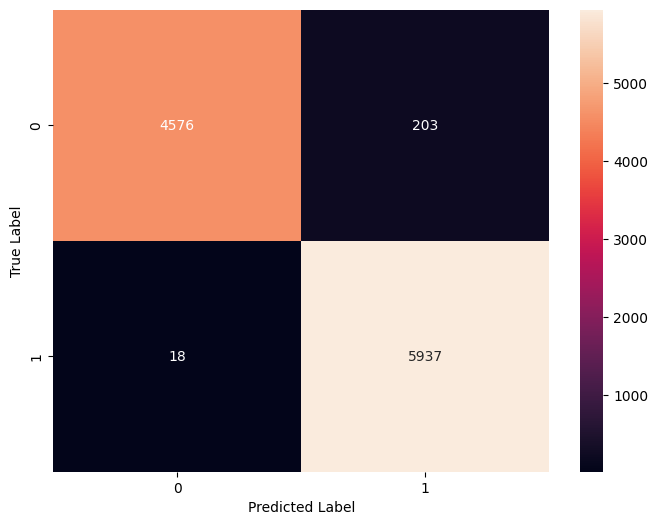

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9669381107491857
Recall: 0.996977329974811
F1 Score: 0.9817279867713932


In [ ]:
# Check the shape of X_test
print(f"Shape of X_test: {X_test.shape}")

# Generate predictions
y_pred = model.predict(X_test)

# Check the shape of y_pred
print(f"Shape of y_pred: {y_pred.shape}")


Shape of X_test: (10734, 532)
336/336 [==============================] - 6s 17ms/step
Shape of y_pred: (10734, 1)


In [ ]:
# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

In [ ]:
y_pred.size

10734

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.9972517428175922


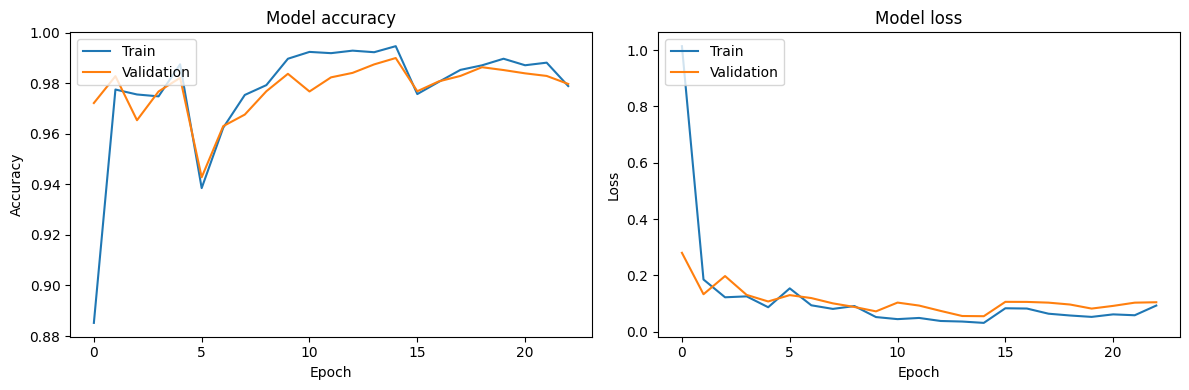

In [ ]:
# Plot training & validation accuracy values (assuming history object exists)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Ablation Study in terms of Hyperparameter Sensitivity and Regularization Impact

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Get the processed data from Data Processing Step
X_train, X_val, X_test, y_train, y_val, y_test, vocab_size = processed_data

In [ ]:
# Define the model
embed_dim = 128  # Embedding dimension
rnn_units = 256 # Number of units in LSTM layers
batch_size = 16  # Batch size for training
learning_rate = 0.0001  # Learning rate

In [ ]:
inputs = Input(shape=(max_len_95_percent,), dtype=tf.int32)

In [ ]:
# Embedding layer to convert word indices to vectors
embeddings = Embedding(vocab_size, embed_dim)(inputs)

In [ ]:
# Bi-directional LSTM layer for processing sequences (without Regularization and Dropout)
x = Bidirectional(LSTM(rnn_units, return_sequences=True))(embeddings)

In [ ]:
# 7. Attention layer
def scaled_dot_product_attention(queries, keys, values):
  """Scaled Dot-Product Attention Layer."""
  scores = tf.matmul(queries, keys, transpose_b=True) / tf.sqrt(tf.cast(tf.shape(keys)[-1], tf.float32))
  weights = tf.nn.softmax(scores, axis=-1)
  output = tf.matmul(weights, values)
  return output

In [ ]:
attention_output = scaled_dot_product_attention(x, x, x)  # Apply attention

In [ ]:
# Global average pooling
x = GlobalAveragePooling1D()(attention_output)

In [ ]:
# Dense layer for output with sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 532)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 532, 128)             2683699   ['input_1[0][0]']             
                                                          2                                       
                                                                                                  
 bidirectional (Bidirection  (None, 532, 512)             788480    ['embedding[0][0]']           
 al)                                                                                              
                                                                                              

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()]
)

In [ ]:
# Train the Model
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=8)

In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/100
2013/2013 [==============================] - 218s 105ms/step - loss: 0.1702 - binary_accuracy: 0.9322 - val_loss: 0.0703 - val_binary_accuracy: 0.9802
Epoch 2/100
2013/2013 [==============================] - 154s 76ms/step - loss: 0.0519 - binary_accuracy: 0.9842 - val_loss: 0.0742 - val_binary_accuracy: 0.9754
Epoch 3/100
2013/2013 [==============================] - 152s 75ms/step - loss: 0.0492 - binary_accuracy: 0.9843 - val_loss: 0.0698 - val_binary_accuracy: 0.9748
Epoch 4/100
2013/2013 [==============================] - 150s 75ms/step - loss: 0.0484 - binary_accuracy: 0.9828 - val_loss: 0.0577 - val_binary_accuracy: 0.9828
Epoch 5/100
2013/2013 [==============================] - 144s 71ms/step - loss: 0.0302 - binary_accuracy: 0.9934 - val_loss: 0.0420 - val_binary_accuracy: 0.9905
Epoch 6/100
2013/2013 [==============================] - 149s 74ms/step - loss: 0.0219 - binary_accuracy: 0.9949 - val_loss: 0.0531 - val_binary_accuracy: 0.9851
Epoch 7/100
2013/2013 [====

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', loss, 'Test accuracy:', accuracy)

671/671 [==============================] - 17s 25ms/step - loss: 0.0368 - binary_accuracy: 0.9901
Test loss: 0.036816515028476715 Test accuracy: 0.9901248216629028


In [ ]:
# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Round and convert to int for binary classification

336/336 [==============================] - 11s 30ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[4689   90]
 [  16 5939]]


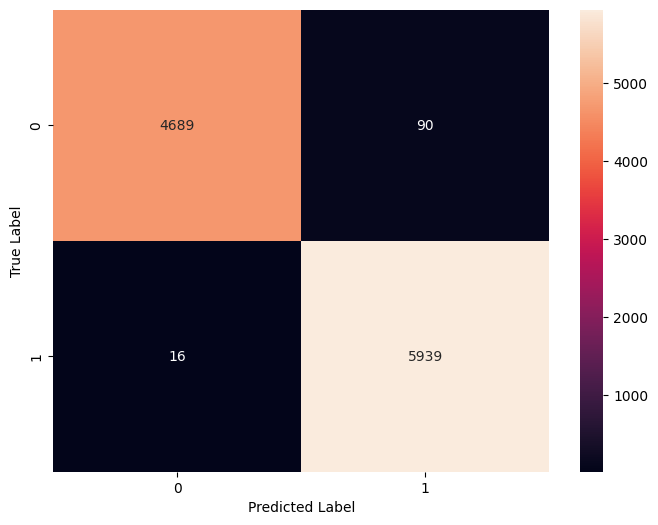

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9850721512688672
Recall: 0.9973131821998321
F1 Score: 0.991154873164219


In [ ]:
# Check the shape of X_test
print(f"Shape of X_test: {X_test.shape}")

# Generate predictions
y_pred = model.predict(X_test)

# Check the shape of y_pred
print(f"Shape of y_pred: {y_pred.shape}")

Shape of X_test: (10734, 532)
336/336 [==============================] - 10s 30ms/step
Shape of y_pred: (10734, 1)


In [ ]:
# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

In [ ]:
y_pred.size

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.9987633062293771


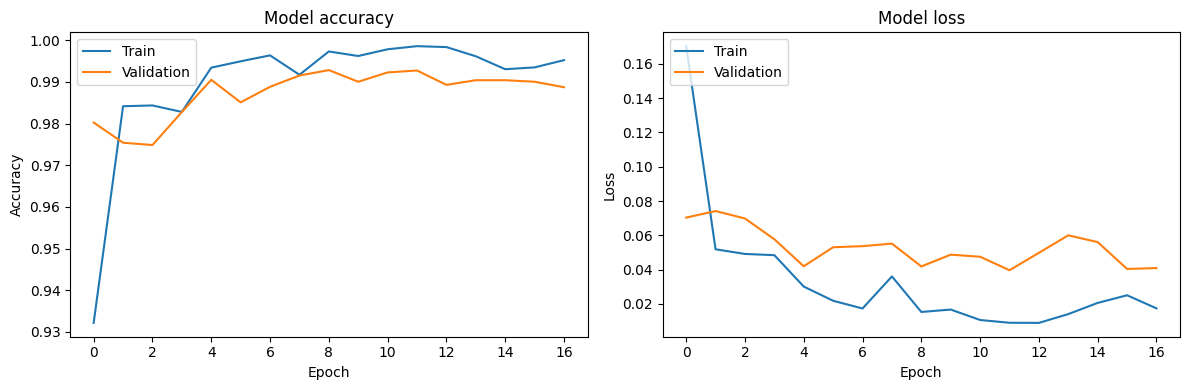

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()